# Лабораторная работа № 2
## Хапчаев Тимур Русланович M32071
### Задание 6

Найдем математическое ожидание случайной величины $X$, имеющей указанную плотность.<br>
Интегрируя, находим:<br>
<br>
$\normalsize E(X) \normalsize = \int_{0}^{\infty} \large x \frac{x^{k-1} e^{-x/\theta}}{(k-1)!\theta^k} dx = \frac{\theta}{(k-1)!}\int_{0}^{\infty} (\frac{x}{\theta})^k e^{-x/\theta} d(\frac{x}{\theta}) = \frac{\theta}{(k-1)!}\int_{0}^{\infty} (y)^k e^{-y} d(y) = \frac{\theta}{(k-1)!}Г(k+1) = \frac{k!\theta}{(k-1)!} = k\theta$,<br>
<br>
Использовали замену $\large y = \frac{x}{\theta}$ и классическое определение гамма-функции $\normalsize Г(a) = \int_{0}^{\infty} x^{a-1} e^{-x} d(x)$, а также ее свойство $Г(n) = (n-1)!, n \in N$.<br>
<br>
Аналогично находим матожидание $X^2$:<br>
<br>
$\normalsize E(X^2) \normalsize = \int_{0}^{\infty} \large x^2 \frac{x^{k-1} e^{-x/\theta}}{(k-1)!\theta^k} dx = \normalsize \frac{\theta^2}{(k-1)!}\int_{0}^{\infty} (\frac{x}{\theta})^{k+1} e^{-x/\theta} d(\frac{x}{\theta}) = \frac{\theta^2}{(k-1)!}\int_{0}^{\infty} (y)^{k+1} e^{-y} d(y) = \frac{\theta^2}{(k-1)!}Г(k+2) = \frac{(k+1)!\theta^2}{(k-1)!} = k(k+1)\theta^2$,<br>
<br>
Тогда дисперсия величины:<br>
<br>
$\text{Var}(X) = E(X^2) - (EX)^2 = k(k+1)\theta^2 - k^2\theta^2 = k\theta^2$.<br>
<br>
Приравнивая полученное матожидание к его выборочному аналогу - выборочному среднему, имеем оценку методом моментов:<br>
<br>
$\normalsize k\hat{\theta}_{\text{MM}} = \overline{x} \longrightarrow \hat{\theta}_{\text{MM}} = \large \frac{\overline{x}}{k}$.<br>
<br>
Так как $E(\overline{x}) = E(\sum_{i=1}^{n} x_i)/n = \sum_{i=1}^{n} E(x_i)/n = nk\theta/n = k\theta \longrightarrow E(\hat{\theta}_{\text{MM}}) = E(\large \frac{\overline{x}}{k}) = \large \frac{k\theta}{k} = \normalsize \theta$, <br>
<br>
То оценка несмещена (использовали факт, что выборка - i. i. d.)
<br>
<br>
В силу закона больших чисел выборочное среднее по вероятности сходится к матожиданию случайной величины <br>(при условии, что выборка i. i. d.), поэтому $\overline{x} \xrightarrow{p} E(X) \longrightarrow \hat{\theta}_{\text{MM}} \xrightarrow{p} E(X)/k = k\theta/k = \theta$ и оценка состоятельна.<br>
<br>
Информация Фишера для одного наблюдения имеет вид ($f(x)$ - плотность нашей величины):<br>
<br>
$I(\theta) = E\large(\frac{dln(f(x))}{d\theta})^2 = \normalsize E(\large \frac{d((k-1)ln(x) - x/\theta - ln((k-1)!) - kln(\theta))}{d\theta})^2 =$<br>
<br>
$ = \normalsize E(\large \frac{x}{\theta^2} - \frac{k}{\theta})^2 = \normalsize E( \frac{1}{\theta^2}(x - k\theta))^2 =  \frac{1}{\theta^4}E(x - k\theta)^2 = \frac{1}{\theta^4}\text{Var}(x) = \large \frac{k\theta^2}{\theta^4} = \frac{k}{\theta^2}$.
<br>
<br>
Тогда:<br>
<br>
$\large \frac{1}{nI(\theta)\text{Var}(\hat{\theta}_{\text{MM}})} = \frac{1}{\Large n\frac{k}{\theta^2}\frac{k\theta^2}{k^2n}} = 1$, поэтому оценка эффективна (её дисперсия достигает в классе несмещённых оценок своей нижней границы по неравенству Рао-Крамера). <br>
Здесь мы использовали выражение для дисперсии оценки, учитывая, что выборка i. i. d.:<br>
<br>
$\text{Var}(\hat{\theta}_{\text{MM}}) = \text{Var}(\large \frac{\overline{x}}{k}) = \large \frac{\text{Var}(\sum_{i=1}^{n} x_i/n)}{k^2} = \frac{n\text{Var}(x_i)}{n^2k^2} = \frac{k\theta^2}{nk^2} = \frac{\theta^2}{kn}$.<br>
<br>

In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
sizes = [50, 100, 500, 1000, 2500]
results = []
np.random.seed(8080)

for size in sizes:
    samples = np.random.gamma(shape = 3, scale = 2, size = (500, size))
    values = np.mean(samples, axis = 1)/3

    results_tmp = sum(abs(values - 2) > 0.01)
    results.append(results_tmp)

    results_tmp = -1

In [144]:
print(sizes)
print(results)

[50, 100, 500, 1000, 2500]
[476, 453, 416, 397, 336]


In [145]:
i = 0
for size in sizes:
    print(f'Для объёма {size} расхождение между оценкой и истинным значением параметра превысило 0.01 в {results[i]} случаев')
    i += 1

Для объёма 50 расхождение между оценкой и истинным значением параметра превысило 0.01 в 476 случаев
Для объёма 100 расхождение между оценкой и истинным значением параметра превысило 0.01 в 453 случаев
Для объёма 500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 416 случаев
Для объёма 1000 расхождение между оценкой и истинным значением параметра превысило 0.01 в 397 случаев
Для объёма 2500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 336 случаев


In [146]:
%matplotlib inline

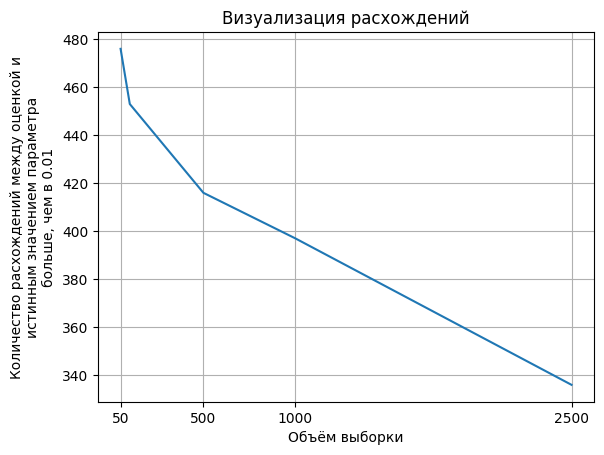

In [147]:
plt.plot(sizes, results)

plt.xlabel("Объём выборки")
plt.ylabel("Количество расхождений между оценкой и"
           "\n"
           "истинным значением параметра" "\n"
           "больше, чем в 0.01")

plt.title(label = "Визуализация расхождений")

plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()

Наблюдаем, что с ростом объёма выборки количество расхождений между оценкой и истинным значением параметра снижается - то есть сближение значения оценки и истинного значения параметра. Отметим, что данный результат характеризует состоятельность нашей оценки - действительно, она состоятельна в силу закона больших чисел. <br>
<br>
Отметим также, что количество расхождений достаточно велико даже при большом объёме выборки (больше 1000), это объясняется тем, что дисперсия оценки равна в нашем случае даже при объёме 2500: $ \text{Var}(\hat{\theta}_{\text{MM}}) = \large \frac{\theta^2}{kn} = \frac{4}{7500}$.<br>
Стандартное отклонение оценки равно $\sqrt{\frac{4}{7500}} = 0.0231$, что больше, чем 0.01. Следовательно, велико количество случаев расхождений между оценкой и истинным значением параметра больше, чем в 0.01.

### Задание 7

Используем параметризацию $p = \theta$.<br>
<br>
$P(X = k) = (1-p)^{k-1}p; k \in N$<br>
<br>
Математическое ожидание величины:<br>
<br>
$E(X) = \sum_{k = 1}^{\infty} kP(X = k) = $<br>
<br> $ = \sum_{k = 1}^{\infty} k(1-p)^{k-1}p = \large -\sum_{k = 1}^{\infty} \frac{d((1-p)^k)}{dp}p = -p\frac{d(\sum_{k = 1}^{\infty}(1-p)^k)}{dp} = -p\frac{d((1-p)/(1 - (1-p)))}{dp} = -p\frac{d((1-p)/p)}{dp} = -p \frac{-1}{p^2} = \frac{1}{p}$.<br>
<br>
Использовали смену порядка производной и суммирования, так как ряд абсолютно сходится, это бесконечно убывающая геометрическая прогрессия со знаменателем $0 \leq 1-p \leq 1$. Также, использована формула суммы членов такой прогрессии.<br>
<br>
Приравнивая полученное ожидание к его выборочному аналогу - выборочному среднему, имеем оценку методом моментов:<br>
<br>
$\large \frac{1}{\hat{\theta}_{\text{MM}}} = \overline{x} \longrightarrow \hat{\theta}_{\text{MM}} = \frac{1}{\overline{x}}$.<br>
<br>
Так как в общем случае математическое ожидание нелинейной функции не является таковой же функцией от математического ожидания, то:<br>
<br>
$\large E(\frac{1}{\overline{x}}) \neq \frac{1}{E(\overline{x})} = \frac{1}{1/\theta} = \theta$ и оценка является смещённой.<br>
<br>
Оценка смещена, следовательно мы не можем говорить о ее эффективности в классе несмещённых оценок, и неравенство Рао-Крамера неприменимо (однако мы можем сравнивать её (асимптотическую) MSE - среднеквадратическую ошибку, с MSE других оценок, для получения некоторого ранжирования имеющихся оценок по качеству).<br>
<br>
В силу закона больших чисел (он применим, так как матожидание величины существует и конечно, и выборка i. i .d.):<br>
<br>
$\large \overline{x} \xrightarrow{p} \normalsize E(X) = \large \frac{1}{\theta} \longrightarrow \normalsize \hat{\theta}_{\text{MM}} = \large \frac{1}{\overline{x}} \xrightarrow{p} \frac{1}{1/\theta} = \theta$, и оценка является состоятельной.

In [148]:
sizes = [50, 100, 500, 1000, 2500]
results = []
np.random.seed(8080)

for size in sizes:
    samples = np.random.geometric(p = 0.3, size = (500, size))
    values = 1/(np.mean(samples, axis = 1))

    results_tmp = sum(abs(values - 0.3) > 0.01)
    results.append(results_tmp)

    results_tmp = -1

In [149]:
print(sizes)
print(results)

[50, 100, 500, 1000, 2500]
[383, 350, 188, 94, 24]


In [150]:
i = 0
for size in sizes:
    print(f'Для объёма {size} расхождение между оценкой и истинным значением параметра превысило 0.01 в {results[i]} случаев')
    i += 1

Для объёма 50 расхождение между оценкой и истинным значением параметра превысило 0.01 в 383 случаев
Для объёма 100 расхождение между оценкой и истинным значением параметра превысило 0.01 в 350 случаев
Для объёма 500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 188 случаев
Для объёма 1000 расхождение между оценкой и истинным значением параметра превысило 0.01 в 94 случаев
Для объёма 2500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 24 случаев


In [151]:
%matplotlib inline

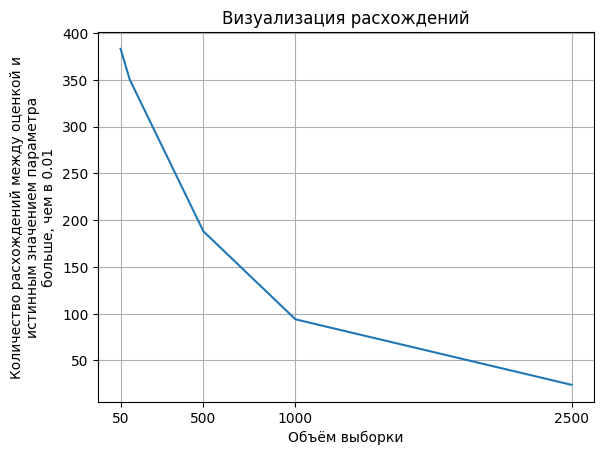

In [152]:
plt.plot(sizes, results)

plt.xlabel("Объём выборки")
plt.ylabel("Количество расхождений между оценкой и"
           "\n"
           "истинным значением параметра" "\n"
           "больше, чем в 0.01")

plt.title(label = "Визуализация расхождений")

plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()

Наблюдаем уменьшение количества расхождений между значением оценки и истинным значением параметра с ростом объёма выборки - это снова подтверждение состоятельности оценки (состоятельна в силу закона больших чисел).
Теперь, однако, результат немного другой относительно первой задачи - количество случаев расхождения уменьшается довольно значительно. Это объясняется, например, тем, что смещённая оценка может быть более эффективной, чем несмещённая. Здесь наблюдается бо́льшая скорость сходимости к истинному значению параметра, чем в предыдущей задаче.